Verion notes - 
version: 2.19
- genres distribution changed: UPDATE DOCUMENT

The code was re-structured to cover the main objective and the additional work separately. Also I have added some section IDs to cater for the project scope:

section id - task:
1 - Libs and functions
    1.1 - Libs imports
    1.2 - Average calculator function
    1.3 - Date Calculation
2 - Load Dataset
    2.1 - load_dataset() - QWASAR#1
    2.2 - Standardise headers / replace spaces
3 - Base Analysis - Cleaning
    3.1 - print_summarize_dataset - QWASAR#2
    3.2 - Show the unique values per columns
    3.3 - Add zero to the null rating values
    3.4 - Cleaning the dataset - QWASAR#3
    3.5 - Dataframe separation for Paid | Free | Total
4 - Analysis of the dataset
    4.1 - Free|Paid split pie
    4.2 - Total Market size
    4.3 - Print summarized dataset
        => this one is there in 3.1
    4.4 - Total Value Summary
        => use mean for price instead of sum
    4.5 - Print historams - QWASAR#4
    4.6 - Compute Correlation Matrix - QWASAR#5
    4.7 - Scatter Matrix - QWASAR#6
5 - Summary of the analysis
    5.1 - Plot most popular apps - QWASAR BLOG#1
        5.1.1 - Plot with bar diagram the most populars paid apps of Family category by installs
        5.1.2 - Plot with bar diagram the most populars paid apps of Family category by rate
    5.2 - Plot with a pie diagram the most popular genres according to the number of installations from paid family - QWASAR BLOG#2
    5.3 - Download Ratio - QWASAR BLOG#3
    5.4 - Size of Market pie - QWASAR BLOG#4
        5.4.1 - Size of Market pie all
        5.4.2 - Size of Market pie paid
    5.5 - Mean Price bar - QWASAR BLOG#5
        5.5.1 - Mean Price bar Paid
        5.5.2 - Mean Price bar All
    5.6 - Most expensive apps per category - QWASAR BLOG#6
6 - Additional considerations
    6.1 - Time Factor
    6.2 - Numeric Assignment of categories
    6.3 - weightted averages

1 - Libs and functions

In [3]:
#1.1 - Libs imports

import pandas as pd
import matplotlib as plt
from matplotlib import pyplot
import seaborn as sns
from pandas.plotting import scatter_matrix
import seaborn as sns
from datetime import date, datetime

In [4]:
#1.2 - Average calculator function

def average_calculator(a,b):
    if a == 0 or b == 0:
        return 0
    else:
        b_a = abs((a-b)/b)/100
        a_b = abs((b-a)/a)
        return (b_a,a_b)

In [5]:
#1.3 - Date Calculation: calcualte the maintenance delay of the application based on the last updated date (assumption is the longer the app was updated the least it is in support)

def maint_del(date):
    date = datetime.strptime(date, "%B %d, %Y").date()
    today = date.today()
    delay = today.year - date.year - ((today.month, today.day) < (date.month, date.day)) #delay since last update
    return delay

def maint_year(date):
    date = datetime.strptime(date, "%B %d, %Y").date()
    year = date.year
    return year
    

2 - Load Dataset
First will be your notebook jupyter with your calculation You will have to implement multiple functions:

In [6]:
#2.1 - load_dataset()

def load_dataset(dataset):
    dataset = pd.read_csv("googleplaystore.csv",index_col=None)
    dataset = dataset.drop(index=0)
    return dataset

source = "googleplaystore.csv"
nohead_raw_dataset = load_dataset(source)
nohead_raw_dataset.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


In [7]:
#2.2 - Standardise headers / replace spaces

def headers(df):
    df.rename(columns={'Content Rating':'Content_Rating','Last Updated':'Last_Updated','Current Ver':"Current_Ver",'Android Ver':"Android_Ver"},inplace=True)
    return df

raw_dataset = headers(nohead_raw_dataset)
raw_dataset.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


In [8]:
#raw_dataset[raw_dataset["App"].str.contains('Minecraft')]
#raw_dataset[raw_dataset["Type"].str.contains('Paid|Free')==False]

3 - Analysis (Base) - Cleaning

In [9]:
#3.1 - print_summarize_dataset
def print_summarize_dataset(dataset):
    print(f"Describe Dataset:\n {dataset.describe()}\n")
    print(f"Dataset Information:\n {dataset.info()}\n")
    print(f"Dataset Count distinct:\n {dataset.nunique()}\n")
    print(f"Null records count: {dataset.isnull().sum()}")

print_summarize_dataset(raw_dataset)

Describe Dataset:
             Rating
count  9366.000000
mean      4.193348
std       0.537459
min       1.000000
25%       4.000000
50%       4.300000
75%       4.500000
max      19.000000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 1 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content_Rating  10839 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last_Updated    10840 non-null  object 
 11  Current_Ver     10832 non-null  object 
 12  Android_Ver     10837 non-null  object 
dtypes: float64(1), objec

In [10]:
#3.2 - Show the unique values per columns
def unique_values(df):
    cat = df['Category'].unique()
    type = df['Type'].unique()
    com_rat = df['Content_Rating'].unique()
    df[['Genres1','Genres2']] = df['Genres'].str.split(';',1,expand=True)
    genr1 = df['Genres1'].unique()
    genr2 = df['Genres2'].unique()
    return cat, type, com_rat, genr1, genr2

unique_labels = unique_values(raw_dataset)
unique_labels

(array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
        'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
        'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
        'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
        'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
        'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
        'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
        'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
        '1.9'], dtype=object),
 array(['Free', 'Paid', nan, '0'], dtype=object),
 array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
        'Adults only 18+', 'Unrated', nan], dtype=object),
 array(['Art & Design', 'Auto & Vehicles', 'Beauty', 'Books & Reference',
        'Business', 'Comics', 'Communication', 'Dating', 'Education',
        'Entertainment', 'Events', 'Finance', 'Food & Drink',
        'Health & Fitness', 'House & Home

In [11]:
#3.3 - Add zero to the null rating values
def rating_fix(df):
    df['Rating'] = df['Rating'].fillna(0)
    return df

raw_dataset = rating_fix(raw_dataset)
raw_dataset.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver,Genres1,Genres2
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,Art & Design,Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,Art & Design,None
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,Art & Design,None
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,Art & Design,Creativity
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up,Art & Design,None


Analysis of the dataset - cleaning, summary, basic information

In [12]:
#3.4 - Cleaning the dataset
#clean the dataset for assessment: corelations - leaving only int in the dataframe
#keep: Rating, Reviews, Size, Installs, Price
#clean_dataset

def clean_dataset(df_in):
    df = df_in
    #clean int fields from unvanted chars
    df['Size'] = df['Size'].replace({'\D+':'0'},regex=True)
    df['Installs'] = df['Installs'].replace({'\D+':'0'},regex=True)
    df['Reviews'] = df['Reviews'].replace({'\D+':'0'},regex=True)
    df['Price'] = df['Price'].replace({'[^0-9.]':''},regex=True)
    df['Price'] = df['Price'].replace({'':'0'},regex=True)
    df = df.astype({'Reviews':'int','Size':'int','Installs':'int64','Price':'float'})
    df['Installs'] = df['Installs']

    #Remove duplicated apps - after checking the dataframe, there are some (i.e.: Minecraft both identical)
    df = df.drop_duplicates(subset=['App'])
    
    #clean the corrupt rows in the dataframe
    df = df.drop(df[df["Type"].str.contains('Paid|Free')==False].index,inplace=False)

    return df

combined_dataset = clean_dataset(raw_dataset)
combined_dataset.head(5)
#combined_dataset.dtypes

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver,Genres1,Genres2
1,Coloring book moana,ART_AND_DESIGN,3.9,967,140,50000000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,Art & Design,Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8070,5000000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,Art & Design,None
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,250,50000000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,Art & Design,None
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2080,10000000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,Art & Design,Creativity
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5060,5000000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up,Art & Design,None


In [13]:
#combined_dataset[combined_dataset["App"].str.contains('Minecraft')]

In [14]:
#3.5 - Dataframe separation for Paid | Free | Total
#create new datasets for paid only, free only and full datasets
def paid(df):
    df2 = df[df['Type'].astype(str).str.contains('Paid')]
    return df2

def free(df):
    df2 = df[df['Type'].astype(str).str.contains('Free')]
    return df2

free_dataset = free(combined_dataset)
paid_dataset = paid(combined_dataset)

print(f"Paid#: {paid_dataset.shape[0]}\nFree#: {free_dataset.shape[0]}\nTotal: {combined_dataset.shape[0]}")

Paid#: 756
Free#: 8901
Total: 9658


4 - Analysis of the dataset

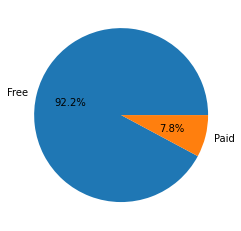

In [15]:
#4.1 - Free|Paid split pie
def plot_type(df):
    pop_pie = df.groupby('Type',as_index=False).count()
    pop_pie = pop_pie[['Type','Installs']]
    pop_pie = pop_pie.nlargest(n=2, columns=['Installs'])
    pyplot.pie(pop_pie['Installs'],labels=pop_pie['Type'],autopct='%1.1f%%')

plot_type(combined_dataset)

In [16]:
#4.2 - Total Market size
#sum total market size, by price -> CHECK VALUES AS NOT MATCHING WITH THE SUMMARY TABLE 
def size_of_market(df):
    print(f"Total market asset value: {(df['Price'].sum()):0.2f} $")
    print(f"Total market sales value: {((df['Price']*df['Installs']).sum()/1_000_000):0.2f} mn $")
    print(f"Total number of paid installs: {(paid_dataset['Installs'].sum()/1_000_000):0.2f}")
    df_fam = df.query("Category == 'FAMILY'")
    print(f"Family category asset value: {(df_fam['Price'].sum()):0.2f} $")
    print(f"Family category sales value: {((df_fam['Price']*df_fam['Installs']).sum()/1_000_000):0.2f} mn $")
    print(f"Family category of installs: {(df_fam['Installs'].sum()/1_000_000):0.2f}")
    
size_of_market(paid_dataset)

Total market asset value: 10618.13 $
Total market sales value: 148890.64 mn $
Total number of paid installs: 41733.62
Family category asset value: 2399.86 $
Family category sales value: 83227.77 mn $
Family category of installs: 15564.46


In [17]:
#4.3 - Print summarized dataset
def print_summarize_dataset(df):
    print(df.describe())

print_summarize_dataset(combined_dataset)

            Rating       Reviews          Size      Installs        Price
count  9658.000000  9.658000e+03   9658.000000  9.658000e+03  9658.000000
mean      3.541085  2.166150e+05   1929.644854  2.637835e+10     1.099413
std       1.575804  1.831413e+06   2594.196845  4.552883e+11    16.853021
min       0.000000  0.000000e+00      0.000000  0.000000e+00     0.000000
25%       3.600000  2.500000e+01    170.000000  1.000000e+05     0.000000
50%       4.200000  9.670000e+02    460.000000  1.000000e+07     0.000000
75%       4.500000  2.940800e+04   3060.000000  1.000000e+09     0.000000
max       5.000000  7.815831e+07  10200.000000  1.000000e+13   400.000000


In [18]:
#4.4 - Total Value Summary: Print the total values by category in percentages
def cat_split(df_cl):
    #df_cl['Value'] = df_cl['Price']*df_cl['Installs']
    df_cl = df_cl[['Category','Price','Installs','Rating','Reviews']]
    df = df_cl.groupby(['Category']).sum()
    df['Installs Share'] = (df[['Installs']]/df_cl['Installs'].sum())*100
    df['Installs Share'] = round(df['Installs Share'],3)
    df['Asset Value'] = (df[['Price']]/df_cl['Price'].sum())*100
    df['Asset Value'] = round(df['Asset Value'],3)
    df['Reviews Share'] = (df[['Reviews']]/df_cl['Reviews'].sum())*100
    df['Reviews Share'] = round(df['Reviews Share'],3)
    df['Value'] = df['Price']*df['Installs']
    df['Value_Share'] = ((df['Price']*df['Installs'])/(df['Price']*df['Installs']).sum())*100
    df['Reviews Share'] = round(df['Reviews Share'],3)
    df = df.sort_values(by=['Installs'], ascending=False)
    
    #Value formatting
    df['Price'] = pd.Series(["${0:.2f}".format(val) for val in df['Price']], index = df.index)
    df['Installs'] = pd.Series(["{0:.2f} mn".format(val/1_000_000) for val in df['Installs']], index = df.index)
    df['Reviews'] = pd.Series(["{0:.2f} k".format(val/1_000) for val in df['Reviews']], index = df.index)
    df['Reviews Share'] = pd.Series(["{0:.2f}%".format(val) for val in df['Reviews Share']], index = df.index)
    df['Asset Value'] = pd.Series(["{0:.2f}%".format(val) for val in df['Asset Value']], index = df.index)
    df['Installs Share'] = pd.Series(["{0:.2f}%".format(val) for val in df['Installs Share']], index = df.index)
    df['Value'] = pd.Series(["${0:.2f} bn".format(val/1_000_000_000) for val in df['Value']], index = df.index)
    df['Value_Share'] = pd.Series(["{0:.2f}%".format(val) for val in df['Value_Share']], index = df.index)
    return df

cat_split_dataset = cat_split(paid_dataset)
cat_split_dataset.head(10)

,Price,Installs,Rating,Reviews,Installs Share,Asset Value,Reviews Share,Value,Value_Share
Category,,,,,,,,,
GAME,$284.31,18299.82 mn,332.3,1572.85 k,43.85%,2.68%,23.84%,$5202.82 bn,11.30%
FAMILY,$2399.86,15564.46 mn,659.7,3632.57 k,37.30%,22.60%,55.07%,$37352.52 bn,81.13%
PERSONALIZATION,$150.48,2125.45 mn,289.1,293.15 k,5.09%,1.42%,4.44%,$319.84 bn,0.69%
PHOTOGRAPHY,$118.28,1087.81 mn,60.2,115.23 k,2.61%,1.11%,1.75%,$128.67 bn,0.28%
TOOLS,$267.25,1072.34 mn,262.7,171.94 k,2.57%,2.52%,2.61%,$286.58 bn,0.62%
COMMUNICATION,$83.14,1035.82 mn,89.4,84.21 k,2.48%,0.78%,1.28%,$86.12 bn,0.19%
SPORTS,$100.00,1024.31 mn,93.6,150.63 k,2.45%,0.94%,2.28%,$102.43 bn,0.22%
LIFESTYLE,$2360.87,1017.90 mn,76.5,47.42 k,2.44%,22.23%,0.72%,$2403.13 bn,5.22%
PRODUCTIVITY,$250.93,141.11 mn,75.7,171.72 k,0.34%,2.36%,2.60%,$35.41 bn,0.08%


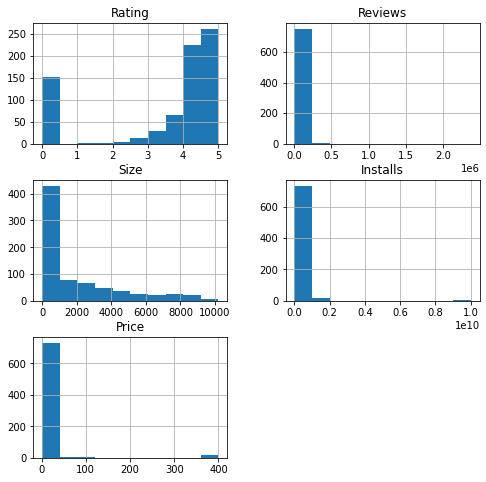

In [19]:
#4.5 - Print historams
def print_histograms(df):
    df.hist(figsize=[8,8])
    pyplot.show()

print_histograms(paid_dataset)

33
ART_AND_DESIGN:{'Rating': 0.08189002141641716, 'Reviews': 0.6805118850637525, 'Size': -0.19037346824358764, 'Installs': 1.0, 'Price': -0.058416293747655265}
AUTO_AND_VEHICLES:{'Rating': 0.16027902416183026, 'Reviews': 0.8401224197605558, 'Size': -0.0991494157018115, 'Installs': 1.0, 'Price': -0.04669697180611974}
BEAUTY:{'Rating': 0.13394167777306876, 'Reviews': 0.9058562015353847, 'Size': -0.0336289199966365, 'Installs': 1.0, 'Price': nan}
BOOKS_AND_REFERENCE:{'Rating': 0.02379960148680075, 'Reviews': 0.321072738997516, 'Size': -0.06581765751662995, 'Installs': 1.0, 'Price': -0.024397663561733705}
BUSINESS:{'Rating': 0.15019218493945602, 'Reviews': 0.7579663680512752, 'Size': -0.0953842400543789, 'Installs': 1.0, 'Price': -0.016587552834736587}
COMICS:{'Rating': 0.0761301866363734, 'Reviews': 0.8190403510680933, 'Size': -0.26826463892538094, 'Installs': 1.0, 'Price': nan}
COMMUNICATION:{'Rating': 0.07697075729469259, 'Reviews': 0.6587443145809209, 'Size': -0.11404477524304918, 'Ins

C:\Users\vikto\AppData\Local\Temp\ipykernel_1452\902454994.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  pyplot.figure(figsize=(10, 6))


PHOTOGRAPHY:{'Rating': 0.041578728082216417, 'Reviews': 0.5749700719467624, 'Size': -0.05476291611305088, 'Installs': 1.0, 'Price': -0.014234940230576434}
SPORTS:{'Rating': 0.1587407738405886, 'Reviews': 0.7951807296612573, 'Size': -0.14518156890463146, 'Installs': 1.0, 'Price': -0.050126217879235296}
TRAVEL_AND_LOCAL:{'Rating': 0.051368771933877386, 'Reviews': 0.7905898117768264, 'Size': -0.05487513857778853, 'Installs': 1.0, 'Price': -0.020758415632695836}
TOOLS:{'Rating': 0.03502492501821809, 'Reviews': 0.21555171141432442, 'Size': -0.04809021614136026, 'Installs': 1.0, 'Price': -0.012711673494502442}
PERSONALIZATION:{'Rating': 0.14995894413560132, 'Reviews': 0.8895100640180909, 'Size': -0.07216308274600981, 'Installs': 1.0, 'Price': -0.10092627974681283}
PRODUCTIVITY:{'Rating': 0.04468062958417307, 'Reviews': 0.31508122741939304, 'Size': -0.056354464996047245, 'Installs': 1.0, 'Price': -0.006337481710274464}
PARENTING:{'Rating': 0.1391853640100084, 'Reviews': 0.8813172083674389, 'S

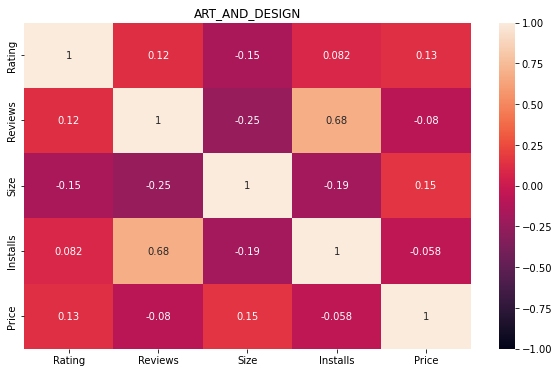

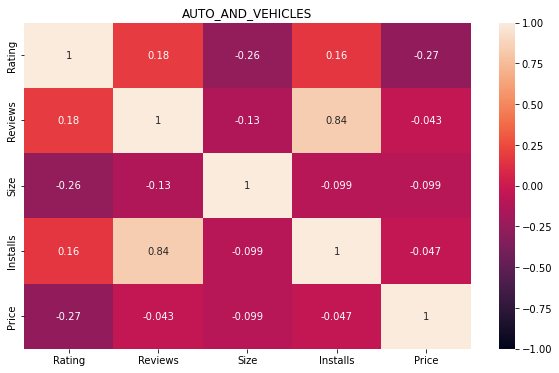

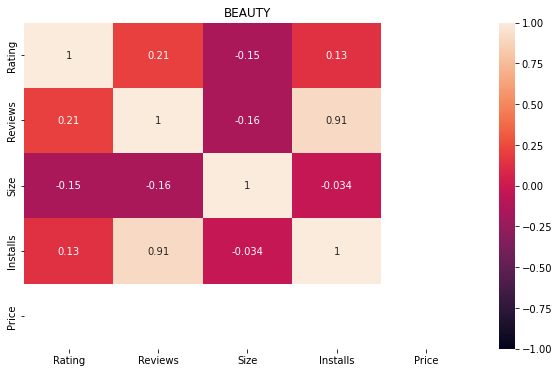

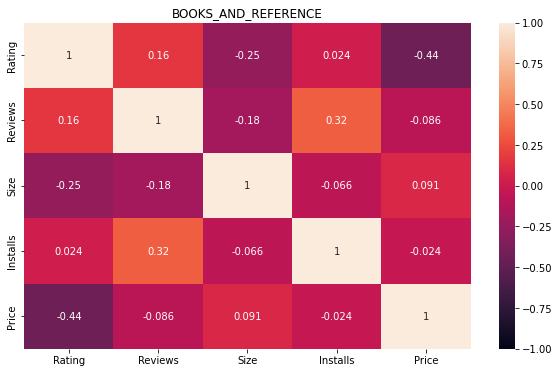

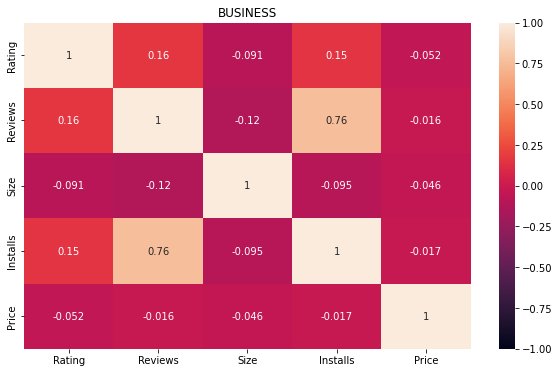

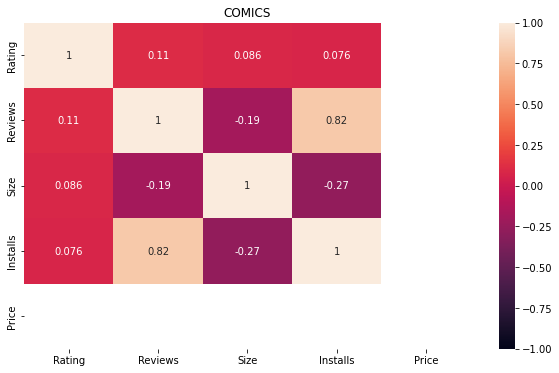

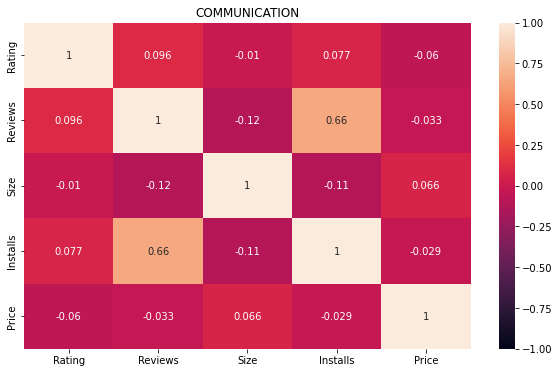

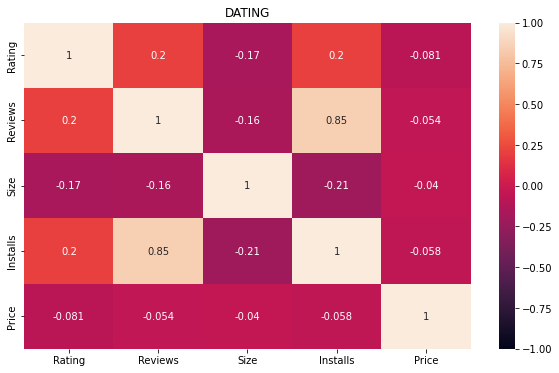

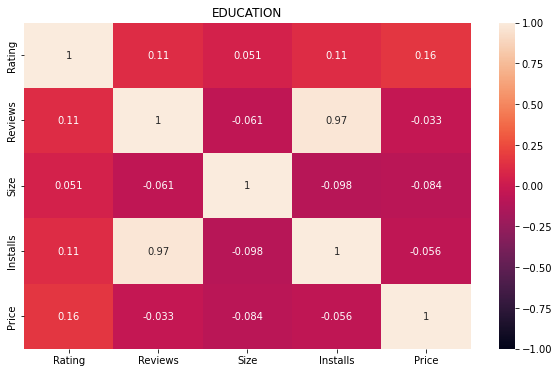

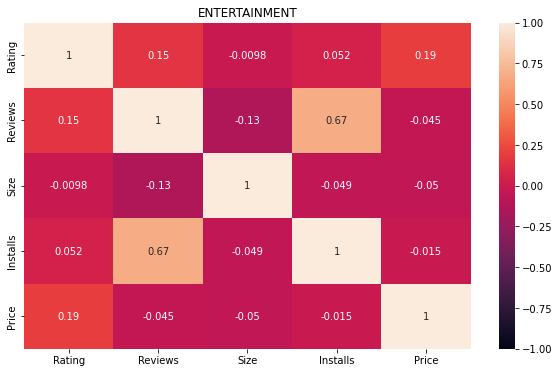

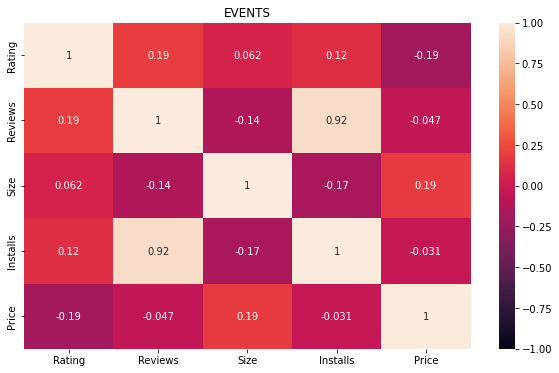

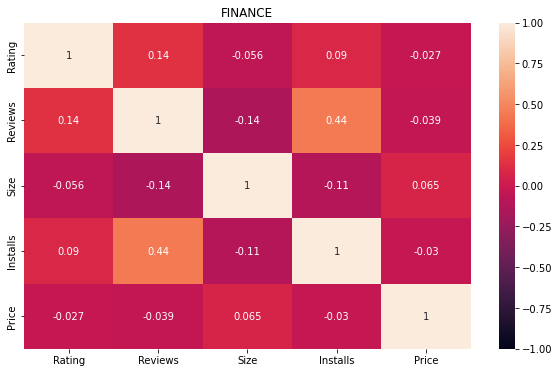

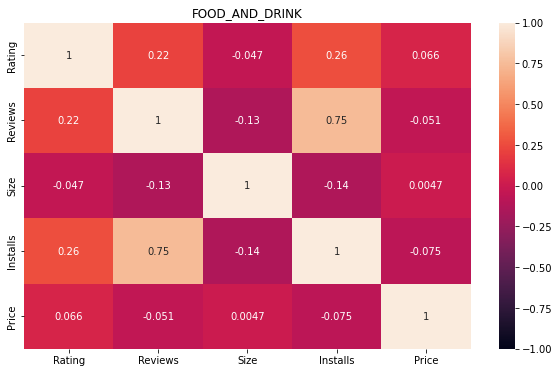

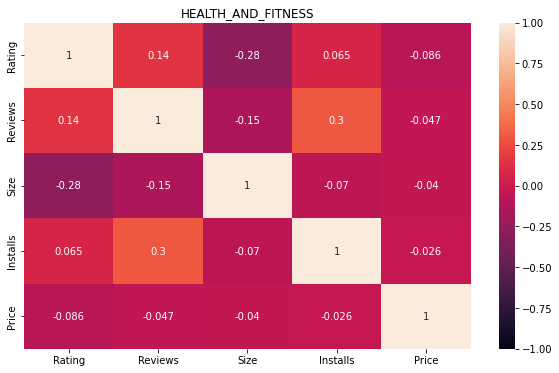

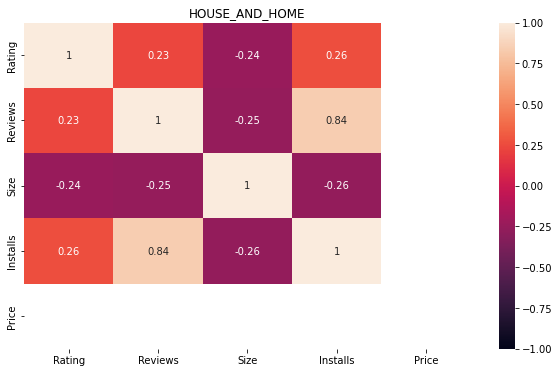

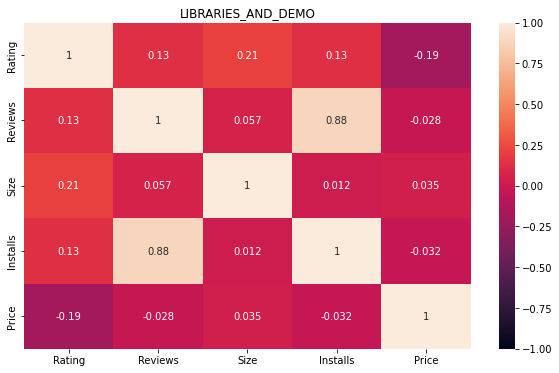

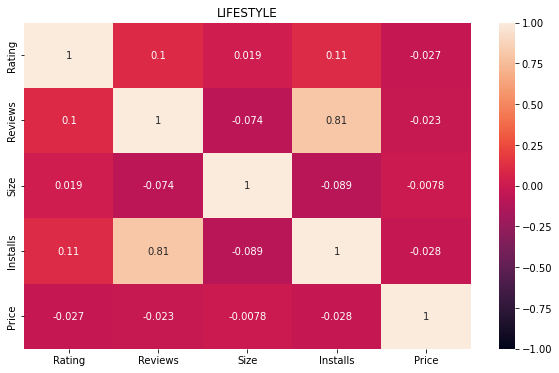

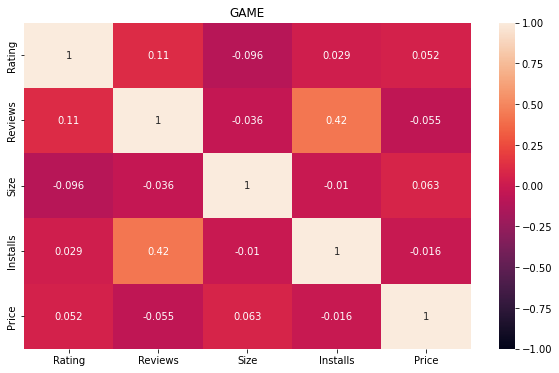

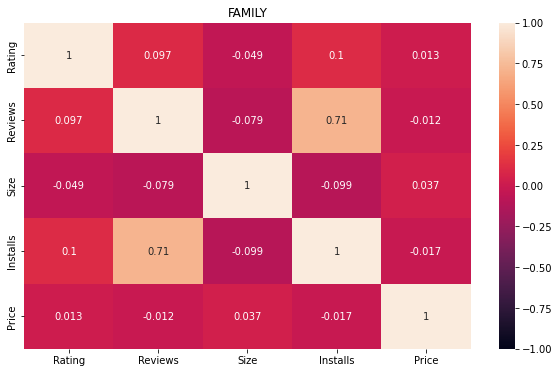

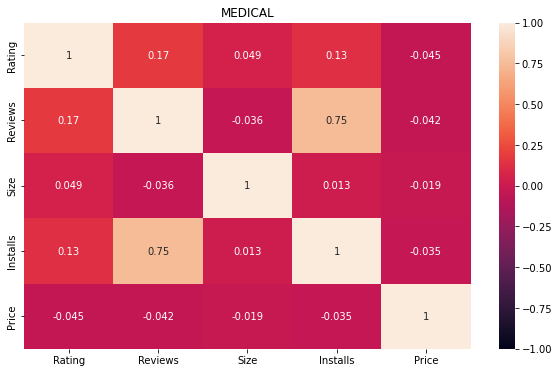

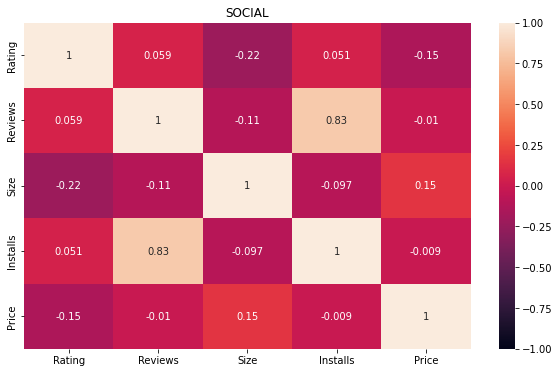

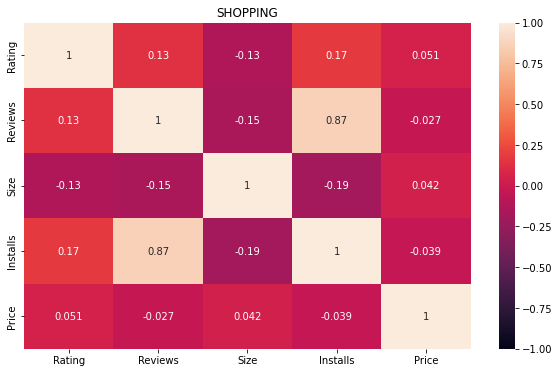

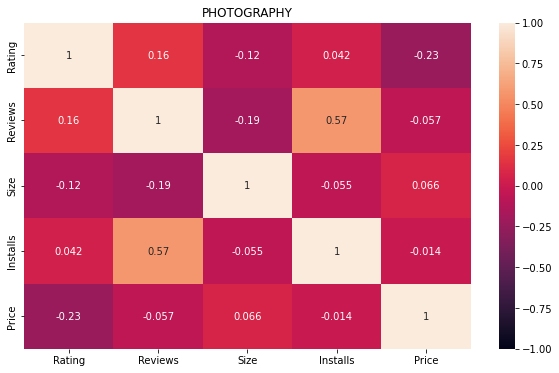

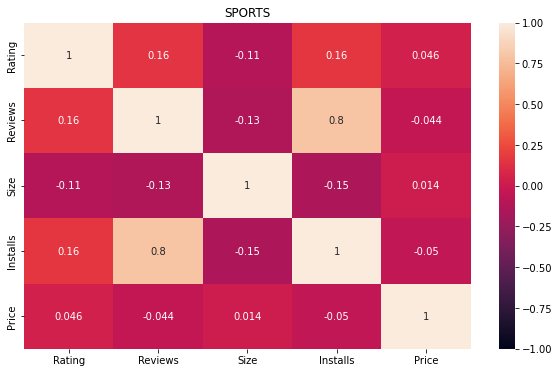

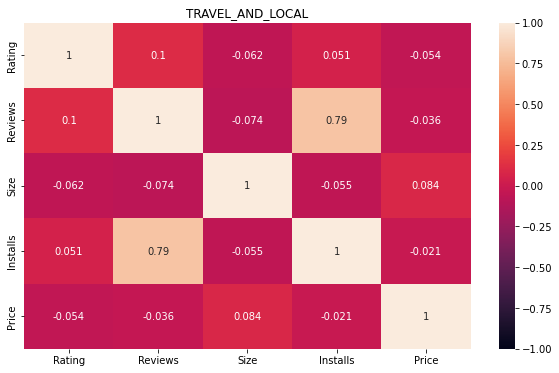

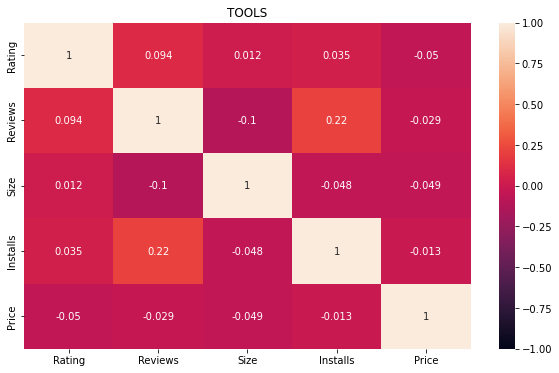

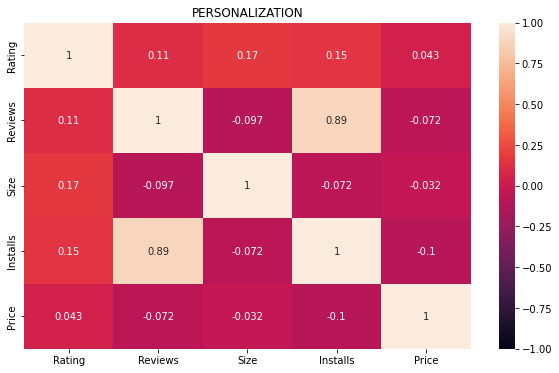

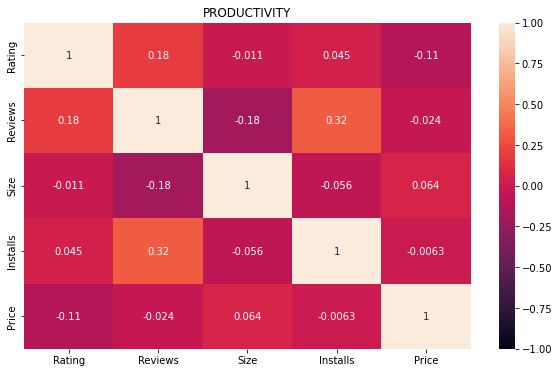

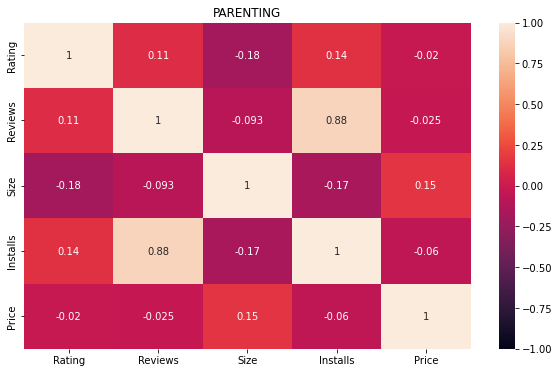

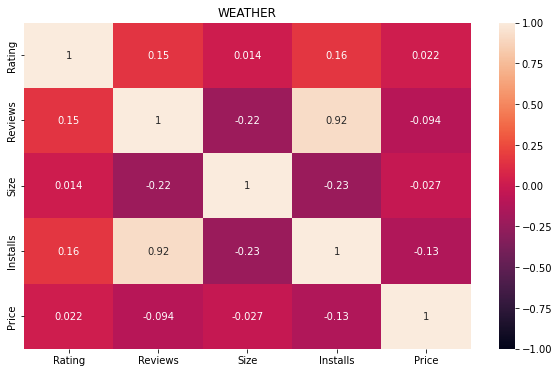

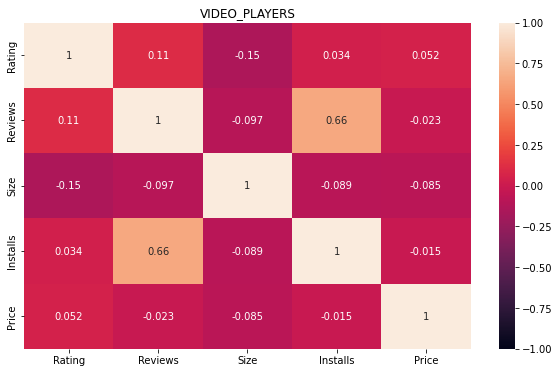

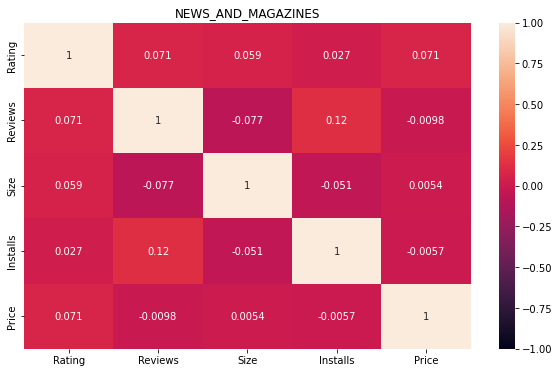

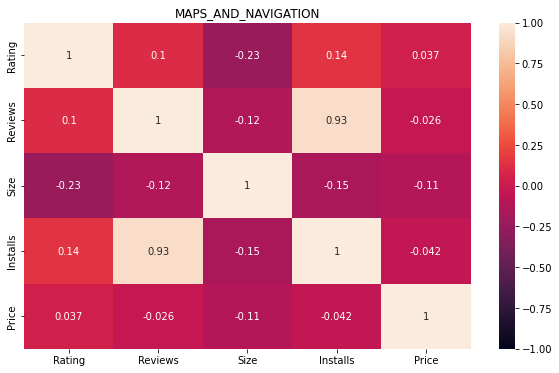

In [20]:
#4.6 - Compute Correlation Matrix: calculate the pearsons correlation coeficient of the dataset:
def compute_correlations_matrix(df,cat):
    category = cat    
    df_fam = df.query("Category == @category")
    corr_df_fam = df_fam.corr()
    corelations_fam = corr_df_fam.to_dict(orient='dict')
    print(f"{cat}:{corelations_fam['Installs']}")
    pyplot.figure(figsize=(10, 6))
    sns.heatmap(corr_df_fam, vmin=-1, vmax=1, annot=True)
    pyplot.title(f'%s' % category)

def correlations_matrix_call(df):
    cat = df['Category'].unique()
    print(len(cat))
    for i in range(len(cat)):
        compute_correlations_matrix(df,cat[i])
    

#compute_correlations_matrix(paid_dataset)
correlations_matrix_call(combined_dataset)

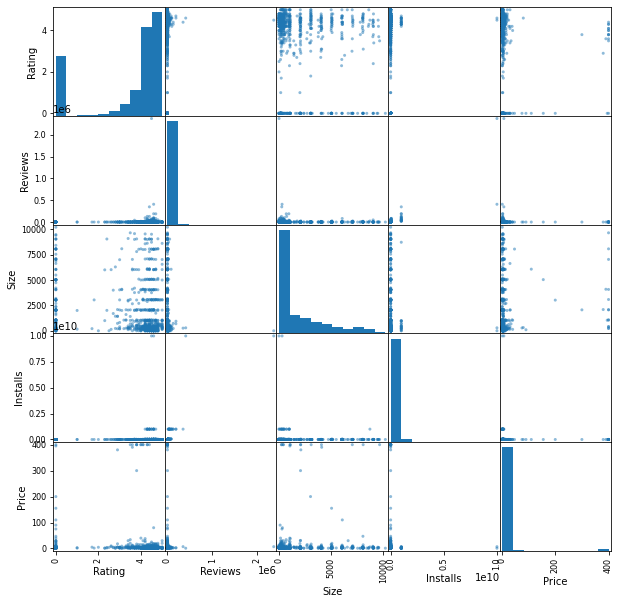

In [21]:
#4.7 - Scatter Matrix
def print_scatter_matrix(df):
    pd.plotting.scatter_matrix(df,figsize=([10,10]))

print_scatter_matrix(paid_dataset)

5 - Summary of the analysis

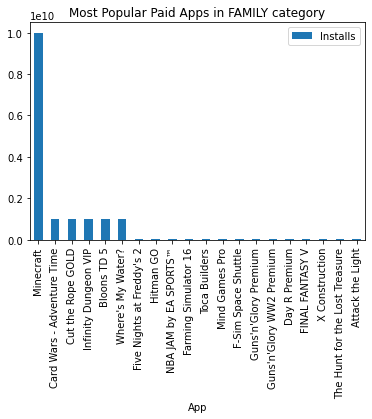

In [22]:
#5.1.1 - Plot with bar diagram the most populars paid apps of Family category by installs
def popular_bar_inst(df):
    df_bar = df.query("Category == 'FAMILY'")
    df_bar = df_bar[['App','Installs']]
    df_bar = df_bar.nlargest(n=20, columns=['Installs'])
    df_bar.plot(x = 'App', y='Installs', title='Most Popular Paid Apps in FAMILY category', kind='bar') 

popular_bar_inst(paid_dataset)

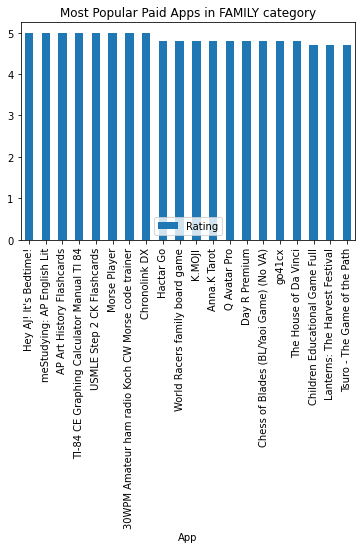

In [23]:
#5.1.2 - Plot with bar diagram the most populars paid apps of Family category by rate
def popular_bar_rate(df):
    df_bar = df.query("Category == 'FAMILY'")
    df_bar = df_bar[['App','Rating']]
    df_bar = df_bar.nlargest(n=20, columns=['Rating'])
    df_bar.plot(x = 'App', y='Rating', title='Most Popular Paid Apps in FAMILY category', kind='bar')

popular_bar_rate(paid_dataset)

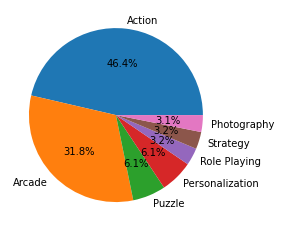

In [48]:
#5.2 - Plot with a pie diagram the most popular genres according to the number of installations from paid family

def popular_piechart(df):
    pop_pie = df.query("Category == 'FAMILY'")
    pop_pie = pop_pie[['Genres1','Installs']]
    pop_pie = df.groupby('Genres1',as_index=False).sum()
    pop_pie = pop_pie.nlargest(n=7, columns=['Installs'])
    pyplot.pie(pop_pie['Installs'],labels=pop_pie['Genres1'],autopct='%1.1f%%',radius=1)

popular_piechart(paid_dataset)

#combined_dataset_dated

In [25]:
#5.3 - Download Ratio: Depending on each category, what are the ratio of download per app?: An array with the number of installation per category
def download_ratio(df):
    df_ipc = df[['Category','Installs']]
    df_ipc = df_ipc.groupby(['Category'],as_index=False).sum()
    ipc_array = df_ipc.to_numpy()
    return ipc_array

downl_ratio = download_ratio(combined_dataset)
print(downl_ratio)

[['ART_AND_DESIGN' 109532801000]
 ['AUTO_AND_VEHICLES' 48512822110]
 ['BEAUTY' 23419610500]
 ['BOOKS_AND_REFERENCE' 10656096455760]
 ['BUSINESS' 689814608650]
 ['COMICS' 41398101500]
 ['COMMUNICATION' 65031726792510]
 ['DATING' 130191881070]
 ['EDUCATION' 344895200000]
 ['ENTERTAINMENT' 11111266000000]
 ['EVENTS' 14196941610]
 ['FAMILY' 4351489785050]
 ['FINANCE' 443334087340]
 ['FOOD_AND_DRINK' 206579717510]
 ['GAME' 22838491594150]
 ['HEALTH_AND_FITNESS' 1127801665120]
 ['HOUSE_AND_HOME' 91621204610]
 ['LIBRARIES_AND_DEMO' 48499509100]
 ['LIFESTYLE' 490481045390]
 ['MAPS_AND_NAVIGATION' 500328018900]
 ['MEDICAL' 27217681770]
 ['NEWS_AND_MAGAZINES' 11362721257600]
 ['PARENTING' 28352101100]
 ['PERSONALIZATION' 1520348327820]
 ['PHOTOGRAPHY' 13640914346550]
 ['PRODUCTIVITY' 14782208113690]
 ['SHOPPING' 1390134357850]
 ['SOCIAL' 32478986349020]
 ['SPORTS' 1085246774980]
 ['TOOLS' 16977674949150]
 ['TRAVEL_AND_LOCAL' 20888688341460]
 ['VIDEO_PLAYERS' 21923389937200]
 ['WEATHER' 356509915

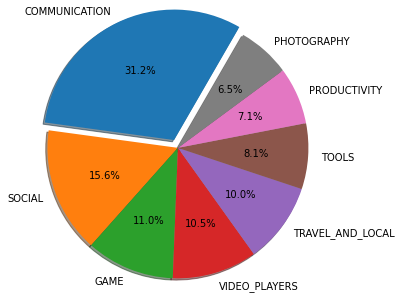

In [26]:
#5.4.1 - Size of Market pie all: What is the size of the market: Plot a pie with the number of installation per category # & %
def mark_size(df):
    df_m_size = df[['Category','Installs']]
    df_m_size = df_m_size.groupby(['Category'],as_index=False).sum()
    m_size_pie = df_m_size.nlargest(n=8, columns=['Installs'])
    explode = (0.1, 0, 0, 0, 0, 0, 0, 0)
    pyplot.pie(m_size_pie['Installs'],labels=m_size_pie['Category'],explode=explode,autopct='%1.1f%%',shadow=True, startangle=60, radius=1.5)
    

mark_size(combined_dataset)

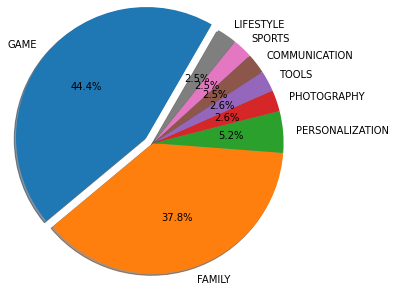

In [27]:
#5.4.2 - Size of Market pie paid
mark_size(paid_dataset)

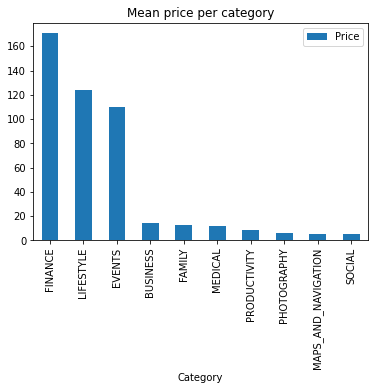

In [28]:
#5.5.1 - Mean Price bar Paid: What is the size of the market: Plot a bar with the mean price per category # & %
def mark_price(df):
    df_m_price = df[['Category','Price']]
    df_m_price = df_m_price.groupby(['Category'],as_index=False).mean()
    m_price_bar = df_m_price.nlargest(n=10, columns=['Price'])
    m_price_bar.plot(x = 'Category', y='Price', title='Mean price per category', kind='bar')
    

mark_price(paid_dataset)


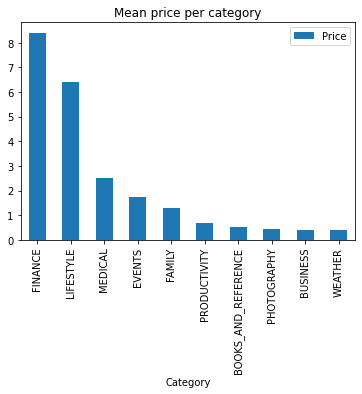

In [29]:
#5.5.2 - Mean Price bar All
mark_price(combined_dataset)

In [30]:
#5.6 - Most expensive apps per category
def max_price(df):
    df_price_max = df[['Category','App','Price','Installs']]
    df_max = df_price_max.groupby('Category',as_index=False).max()
    df_max = df_max
    return df_max
    

max_price(paid_dataset)

,Category,App,Price,Installs
0,ART_AND_DESIGN,"X Launcher Pro: PhoneX Theme, OS11 Control Center",1.99,1000000
1,AUTO_AND_VEHICLES,Билеты ПДД CD 2019 PRO,9.99,5000000
2,BOOKS_AND_REFERENCE,ch-mm Dict,6.49,1000000
3,BUSINESS,TurboScan: scan documents and receipts in PDF,89.99,10000000
4,COMMUNICATION,pretty Easy privacy p≡p,19.99,1000000000
5,DATING,Truth or Dare Pro,7.99,1000000
6,EDUCATION,Toca Life: Hospital,5.99,50000000
7,ENTERTAINMENT,My Talking Pet,4.99,10000000
8,EVENTS,BP Fitness Lead Scanner,109.99,10
9,FAMILY,¡Ay Caramba!,399.99,10000000000


6 - Additional considerations

{'Category_Num': nan, 'Type_Num': -0.08008556966460939, 'Genres1_Num': 0.05535436172567318, 'Genres2_Num': 0.014947218196087372, 'Price': -0.017398363849693035, 'Installs': 1.0, 'Rating': 0.10161765373066947, 'Reviews': 0.7125909890871267, 'Content_Rating_Num': 0.06174803763797841}


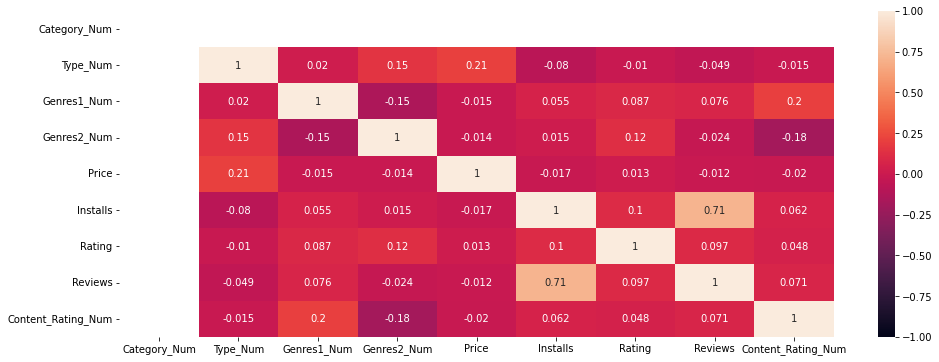

In [31]:
#6.1 - Numeric Assignment of categories: Create unified numeric assignment to find corelations
def label_numerate(df):
    df['Category_Num'] = df['Category'].astype('category')
    df['Category_Num'] = df['Category_Num'].cat.codes
    df['Type_Num'] = df['Type'].astype('category')
    df['Type_Num'] = df['Type_Num'].cat.codes
    df['Content_Rating_Num'] = df['Content_Rating'].astype('category')
    df['Content_Rating_Num'] = df['Content_Rating_Num'].cat.codes
    df['Genres1_Num'] = df['Genres1'].astype('category')
    df['Genres1_Num'] = df['Genres1_Num'].cat.codes
    df['Genres2_Num'] = df['Genres2'].astype('category')
    df['Genres2_Num'] = df['Genres2_Num'].cat.codes

    #change number categories to int
    df['Category_Num'] = df['Category_Num'].astype('int')
    df['Type_Num'] = df['Type_Num'].astype('int')
    df['Content_Rating_Num'] = df['Content_Rating_Num'].astype('int')
    df['Genres1_Num'] = df['Genres1_Num'].astype('int')
    df['Genres2_Num'] = df['Genres2_Num'].astype('int')

    df = df[['Category_Num','Category','Type_Num','Type','Genres1_Num','Genres2_Num','Genres1','Genres2','App','Price','Installs','Rating','Reviews','Content_Rating_Num','Content_Rating','Last_Updated']]
    return df

def enumerated_correlations(df):    
    df = df.query("Category == 'FAMILY'")
    en_corr_df = df.corr()
    corelations = en_corr_df.to_dict(orient='dict')
    print(corelations['Installs'])
    pyplot.figure(figsize=(16, 6))
    sns.heatmap(en_corr_df, vmin=-1, vmax=1, annot=True)

enumerated_dataset = label_numerate(combined_dataset)#fix paid and free
enumerated_correlations(enumerated_dataset)

C:\Users\vikto\AppData\Local\Temp\ipykernel_1452\2327990227.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_a['Upd_Delay'] = df['Last_Updated'].apply(maint_del).astype(int)
C:\Users\vikto\AppData\Local\Temp\ipykernel_1452\2327990227.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_a['Updt_Year'] = df_a['Last_Updated'].apply(maint_year).astype(int)


           Category  Updt_Year  App
23           FAMILY       2012    4
24           FAMILY       2013    8
25           FAMILY       2014   15
26           FAMILY       2015   16
27           FAMILY       2016   27
28           FAMILY       2017   44
29           FAMILY       2018   69
35             GAME       2013    2
36             GAME       2014    5
37             GAME       2015   12
38             GAME       2016   12
39             GAME       2017   21
40             GAME       2018   30
62  PERSONALIZATION       2013    7
63  PERSONALIZATION       2014    3
64  PERSONALIZATION       2015    8
65  PERSONALIZATION       2016    9
66  PERSONALIZATION       2017   16
67  PERSONALIZATION       2018   38
68      PHOTOGRAPHY       2014    2
69      PHOTOGRAPHY       2015    1
70      PHOTOGRAPHY       2016    4
71      PHOTOGRAPHY       2017    6
72      PHOTOGRAPHY       2018    6
88            TOOLS       2011    3
89            TOOLS       2013    1
90            TOOLS       20

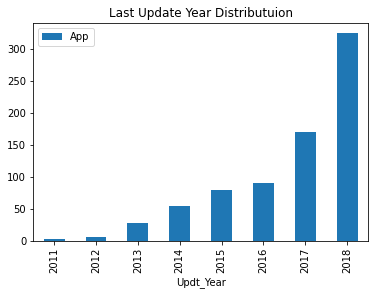

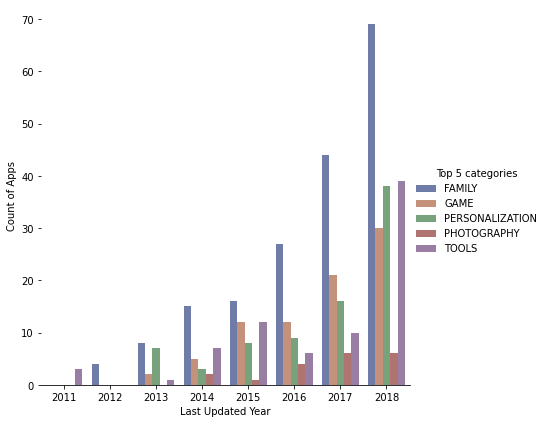

In [32]:
#6.1 - Time Factor: Definition of the years since the application was last time updated.

def define_app_support(df_a):
    df = df_a
    #df_a = df.query("Category == 'FAMILY'")
    df_a['Upd_Delay'] = df['Last_Updated'].apply(maint_del).astype(int)
    df_a['Updt_Year'] = df_a['Last_Updated'].apply(maint_year).astype(int)
    return df_a

#DEFINTION OF THE DATASET TO BE USED FUTHER - Paid, Free, Full set
combined_dataset_dated_paid = define_app_support(paid_dataset)
combined_dataset_dated = define_app_support(combined_dataset)
combined_dataset_dated_paid

def year_distribution(df):
    chart = df.groupby(['Updt_Year']).count()
    chart.plot(y='App', use_index=True, title='Last Update Year Distributuion', kind='bar')
    #dataset_updates

def year_cat_distribution(df,cat):
    df_cat = df[['Category','App','Updt_Year']]
    df_cat = df_cat.groupby(['Category','Updt_Year'],as_index=False).count()
    top_categories = ['GAME','FAMILY','PERSONALIZATION','PHOTOGRAPHY','TOOLS']
    df_cat = df_cat[df_cat["Category"].isin(top_categories)]
    #print(df_cat)
    chart = sns.catplot(data=df_cat, kind='bar',x='Updt_Year',y='App',hue='Category',errorbar="sd", palette="dark", alpha=.6, height=6)
    chart.despine(left=True)
    chart.set_axis_labels("Last Updated Year", "Count of Apps")
    chart.legend.set_title("Top 5 categories")
    return df_cat


year_distribution(combined_dataset_dated_paid)
print(year_cat_distribution(combined_dataset_dated_paid,cat_split_dataset))

#FIX DATASET Y-2 exclusion

,Category,App,Rating,Reviews,Weighted Rating by Reviews,Weighted Perc
2241,FAMILY,Minecraft,4.5,2376564,3.631954,0.807985
9678,FAMILY,Where's My Water?,4.7,188740,0.301259,0.067020
2242,FAMILY,Card Wars - Adventure Time,4.3,129603,0.189261,0.042104
9154,FAMILY,NBA JAM by EA SPORTS™,4.3,56444,0.082426,0.018337
7610,FAMILY,Ski Safari: Adventure Time,4.5,48754,0.074508,0.016575
...,...,...,...,...,...,...
7629,FAMILY,Wuwu & Co.,0.0,9,0.000000,0.000000
7339,FAMILY,"Reading Race 1b: sh, ch words",0.0,2,0.000000,0.000000
6560,FAMILY,Bo's Matching Game,0.0,3,0.000000,0.000000
9669,FAMILY,Masha and the Bear- House Cleaning Games for G...,0.0,0,0.000000,0.000000


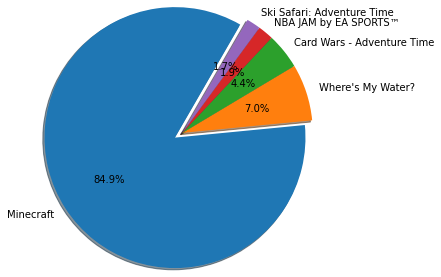

In [33]:
#6.3 - Averages
    
def average_inst_rev(df):
    df = df.query("Category == 'FAMILY'")
    df = df.dropna()
    df['Weighted Rating by Reviews'] = abs((df['Rating']*df['Reviews'])/df['Reviews'].sum())
    df['Weighted Perc'] = abs(df['Weighted Rating by Reviews']/df['Weighted Rating by Reviews'].sum())
    df_avgs = df[['Category','App','Rating','Reviews','Weighted Rating by Reviews','Weighted Perc']]
    w_avg_pie = df_avgs.nlargest(n=5, columns=['Weighted Rating by Reviews'])
    explode = (0.1, 0, 0, 0, 0)
    pyplot.pie(w_avg_pie['Weighted Rating by Reviews'],labels=w_avg_pie['App'],explode=explode,autopct='%1.1f%%',shadow=True, startangle=60, radius=1.5)
    df_avgs = df_avgs.sort_values(by=['Weighted Rating by Reviews'], ascending=False)
    return df_avgs

dataset_avg = average_inst_rev(paid_dataset)
dataset_avg

C:\Users\vikto\AppData\Local\Temp\ipykernel_1452\3441635208.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['inst_rev'] = abs((temp_df['Reviews']-temp_df['Installs'])/temp_df['Installs'])/100
C:\Users\vikto\AppData\Local\Temp\ipykernel_1452\3441635208.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rev_inst'] = abs((temp_df['Installs']-temp_df['Reviews'])/temp_df['Reviews'])
C:\Users\vikto\AppData\Local\Temp\ipykernel_1452\3441635208.py:9: SettingWithCopyWarning: 
A value is trying to be set 

,Category,App,Installs,Reviews,inst_rev,users_engaged,wavg
9669,FAMILY,Masha and the Bear- House Cleaning Games for G...,1000,0,0.010000,-inf,0.000000e+00
6560,FAMILY,Bo's Matching Game,100000,3,0.010000,-3.333133e+04,1.927468e-05
8191,FAMILY,Peppa Pig: Party Time,1000000,52,0.009999,-1.922877e+04,3.340945e-03
6565,FAMILY,Bo's Dinnertime Story,100000,6,0.009999,-1.666467e+04,3.854937e-05
2086,FAMILY,Sago Mini Big City,100000,8,0.009999,-1.249800e+04,5.139916e-05
...,...,...,...,...,...,...,...
7339,FAMILY,"Reading Race 1b: sh, ch words",500,2,0.009960,-2.480000e+02,6.424894e-08
2172,FAMILY,World Racers family board game,1000,4,0.009960,-2.480000e+02,2.569958e-07
7610,FAMILY,Ski Safari: Adventure Time,10000000,48754,0.009951,-2.031114e+02,3.132393e+01
7629,FAMILY,Wuwu & Co.,1000,9,0.009910,-1.091111e+02,5.782405e-07


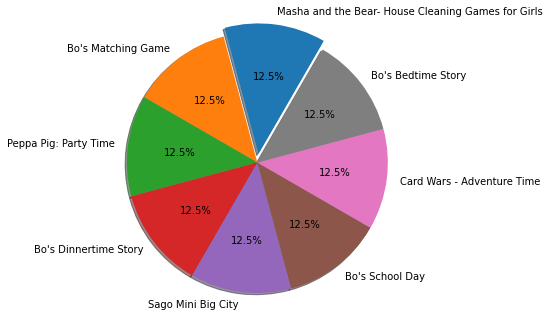

In [34]:
#6.3 - Averages
    
def average_inst_rev(df):
    df = df.query("Category == 'FAMILY'")
    temp_df = df
    df = temp_df.dropna()
    df['inst_rev'] = abs((temp_df['Reviews']-temp_df['Installs'])/temp_df['Installs'])/100
    df['rev_inst'] = abs((temp_df['Installs']-temp_df['Reviews'])/temp_df['Reviews'])
    df['sum_inst'] = temp_df['Installs'].sum()
    df['wavg'] = abs(temp_df['Reviews']*temp_df['Installs']/temp_df['Installs'].sum())
    #print(dataset_clean.dtypes)
    df['users_engaged'] = 1-df['rev_inst']
    df_avgs = df[['Category','App','Installs','Reviews','inst_rev','users_engaged','wavg']]
    w_avg_pie = df_avgs.nlargest(n=8, columns=['inst_rev'])
    explode = (0.1, 0, 0, 0, 0, 0, 0, 0)
    pyplot.pie(w_avg_pie['inst_rev'],labels=w_avg_pie['App'],explode=explode,autopct='%1.1f%%',shadow=True, startangle=60, radius=1.5)
    df_avgs = df_avgs.sort_values(by=['inst_rev'], ascending=False)
    return df_avgs

dataset_avg = average_inst_rev(paid_dataset)
dataset_avg